# Análisis de calificaciones

Hola, este es el código del análisis de calificaciones

In [1]:
# Primero cargamos las librerías
import keras as keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras import layers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


In [2]:
# Cargamos los datos
data = pd.read_csv(
    'C:/Users/crisd/OneDrive/Escritorio/Blog/crisdavid3335.github.io/material-tutoriales/calificaciones-de-matematicas.csv')


In [3]:
# Abrimos los datos de los primeros 5 estudiantes
data.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Revisamos las dimensiones de los datos
data.shape


(395, 33)

In [5]:
# Nombres de las variables
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
# Nuestra variable objetivo es 'G3' porque es la variable que queremos predecir
data['G3'].describe()


count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

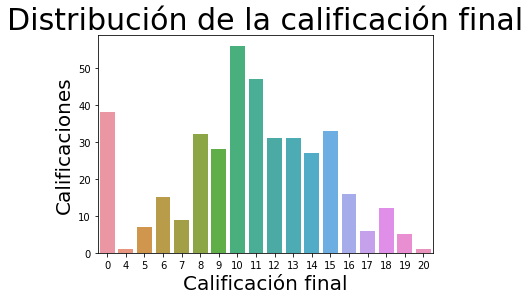

In [7]:
# Gráfico de las calificaciones finales
target = sns.countplot(x='G3', data=data)
target.axes.set_title('Distribución de la calificación final', fontsize=30)
target.set_xlabel('Calificación final', fontsize=20)
target.set_ylabel('Calificaciones', fontsize=20)
plt.show()


In [8]:
# Valores nulos por variable
data.isnull().any()


school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
# Valores nulos (cantidad) y tipo de variable por variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
# Generamos variables para el sexo de los estudiantes
students_m = len(data[data['sex'] == 'M'])
students_f = len(data[data['sex'] == 'F'])
print(f'Número de estudiantes hombres: {students_m}')
print(f'Número de estudiantes mujeres: {students_f}')


Número de estudiantes hombres: 187
Número de estudiantes mujeres: 208


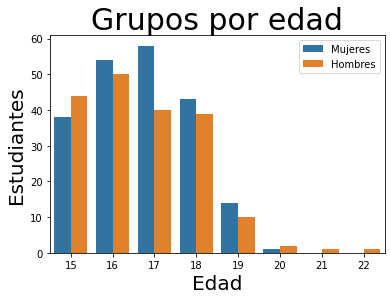

In [11]:
# Gráfico de los estudiantes por sexo y por edad
sex_students = sns.countplot(x='age', hue='sex', data=data)
sex_students.axes.set_title('Grupos por edad', fontsize=30)
sex_students.set_xlabel('Edad', fontsize=20)
sex_students.set_ylabel('Estudiantes', fontsize=20)
sex_students.legend(['Mujeres', 'Hombres'], loc='upper right')
plt.show()


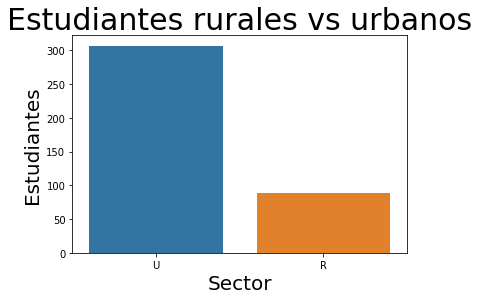

In [12]:
# Gráfico de los estudiantes por dirección
address_students = sns.countplot(x='address', data=data)
address_students.axes.set_title('Estudiantes rurales vs urbanos', fontsize=30)
address_students.set_xlabel('Sector', fontsize=20)
address_students.set_ylabel('Estudiantes', fontsize=20)
plt.show()


In [13]:
# Las variables que más se asocian con la calificación final
data.corr()['G3'].sort_values(ascending=False)


G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
Fedu          0.152457
studytime     0.097820
famrel        0.051363
absences      0.034247
freetime      0.011307
Walc         -0.051939
Dalc         -0.054660
health       -0.061335
traveltime   -0.117142
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64

In [14]:
# Eliminamos las variables que no aportan mucha información
data.drop(['school'], axis=1, inplace=True)


In [15]:
# Generamos el conjunto de datos total
data_total = data.copy()
# Vamos a convertir estas variables a datos binarios (1 y 0)
categorical_d = {'yes': 1, 'no': 0}

data_total['schoolsup'] = data_total['schoolsup'].map(categorical_d)
data_total['famsup'] = data_total['famsup'].map(categorical_d)
data_total['paid'] = data_total['paid'].map(categorical_d)
data_total['activities'] = data_total['activities'].map(categorical_d)
data_total['nursery'] = data_total['nursery'].map(categorical_d)
data_total['higher'] = data_total['higher'].map(categorical_d)
data_total['internet'] = data_total['internet'].map(categorical_d)
data_total['romantic'] = data_total['romantic'].map(categorical_d)


In [16]:
# Convertimos las demas variables a datos binarios
categorical_d = {'F': 1, 'M': 0}
data_total['sex'] = data_total['sex'].map(categorical_d)

categorical_d = {'U': 1, 'R': 0}
data_total['address'] = data_total['address'].map(categorical_d)

categorical_d = {'LE3': 1, 'GT3': 0}
data_total['famsize'] = data_total['famsize'].map(categorical_d)

categorical_d = {'T': 1, 'A': 0}
data_total['Pstatus'] = data_total['Pstatus'].map(categorical_d)

categorical_d = {'teacher': 0, 'health': 1,
                'services': 2, 'at_home': 3, 'other': 4}
data_total['Mjob'] = data_total['Mjob'].map(categorical_d)
data_total['Fjob'] = data_total['Fjob'].map(categorical_d)

categorical_d = {'home': 0, 'reputation': 1, 'course': 2, 'other': 3}
data_total['reason'] = data_total['reason'].map(categorical_d)

categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_total['guardian'] = data_total['guardian'].map(categorical_d)


In [17]:
# Dividimos los conjuntos de datos y de objetivos
X = data_total.drop('G3', axis=1)
y = data_total['G3']


In [18]:
# Dividimos los conjuntos de prueba y evaluación
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [19]:
# Cargamos los modelos que vamos a usar (aprendizaje automático)
svm_model = SVR()
rf_model = RandomForestRegressor(n_estimators=150)


In [20]:
# Entrenamos los modelos de aprendizaje automático
svm_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=150)

In [21]:
# Generamos las predicciones
y_svm_model = svm_model.predict(X_test)
y_rf_model = rf_model.predict(X_test)

In [22]:
# Evaluamos los modelos
# Error cuadratico medio
score_svm_mse = mean_squared_error(y_svm_model, y_test)
score_rf_mse = mean_squared_error(y_rf_model, y_test)
# Error absoluto medio
score_svm_mae = mean_absolute_error(y_svm_model, y_test)
score_rf_mae = mean_absolute_error(y_rf_model, y_test)

In [23]:
# Error de los modelos
print('MSE para el modelo de maquinas de soporte:', round(score_svm_mse, 2),
    '\nMSE para el modelo de bosque aleatorio: ', round(score_rf_mse, 2))
print('MAE para el modelo de maquinas de soporte:', round(score_svm_mae, 2),
    '\nMAE para el modelo de bosque aleatorio: ', round(score_rf_mae, 2))


MSE para el modelo de maquinas de soporte: 6.46 
MSE para el modelo de bosque aleatorio:  3.49
MAE para el modelo de maquinas de soporte: 1.52 
MAE para el modelo de bosque aleatorio:  1.08


In [24]:
# Ahora usaremos una red neuronal
# Definimos el modelo
nn_model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])


In [25]:
# Compilamos el modelo
nn_model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [26]:
# Entrenamos el modelo
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 1s 27ms/step - loss: 34.4077 - mae: 4.9928 - val_loss: 11.8196 - val_mae: 2.6586
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 9.5103 - mae: 2.1773 - val_loss: 8.9444 - val_mae: 2.2020
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 7.6568 - mae: 1.9194 - val_loss: 6.9189 - val_mae: 1.8006
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 6.5179 - mae: 1.6966 - val_loss: 6.4359 - val_mae: 2.0040
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 5.3742 - mae: 1.5438 - val_loss: 4.8553 - val_mae: 1.6206
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 4.4146 - mae: 1.3748 - val_loss: 3.9229 - val_mae: 1.2837
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 4.2491 - mae: 1.3826 - val_loss: 3.5705 - val_mae: 1.2763
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 3.7526 - mae: 1.2743 - 

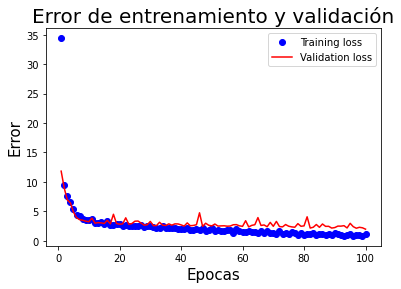

In [27]:
# Grafica de la evolución del error
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Error de entrenamiento y validación', fontsize=20)
plt.xlabel('Epocas', fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.legend()
plt.show()


In [28]:
# Generamos las predicciones
y_nn_model = nn_model.predict(X_test)

In [29]:
# Evaluamos el modelo
# Error cuadratico medio
score_nn_mse = mean_squared_error(y_nn_model, y_test)
# Error absoluto medio
score_nn_mae = mean_absolute_error(y_nn_model, y_test)

In [30]:
# Error de los modelos
print('MSE para el modelo de red neuronal: ', round(score_nn_mse, 2))
print('MAE para el modelo de red neuronal: ', round(score_nn_mae, 2))

MSE para el modelo de red neuronal:  3.82
MAE para el modelo de red neuronal:  1.31
